In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

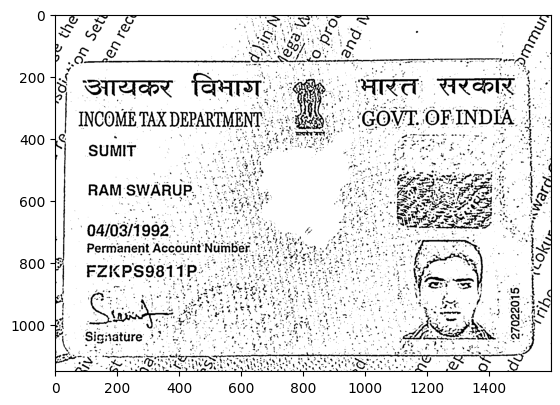

In [2]:
img_path="data\\01_raw_data\\pan.jpeg"
img=cv2.imread(img_path)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred_img=cv2.GaussianBlur(gray_img,(7,7),0)
thresh=cv2.adaptiveThreshold(blurred_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(thresh,cmap="gray")
plt.show()

In [3]:
#define the structuring element
#You can adjust the kernel size as needed

kernel=np.ones((3,3),np.uint8)
#Applying morphological operation
#Erosion to remopve noise

eroded_img=cv2.erode(thresh,kernel,iterations=1)

#Dilation to recover the obeject size

dilated_img=cv2.dilate(eroded_img,kernel,iterations=1)

#you can also use opening which is erosion followed by dilation

opened_img=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)


#Display images (if using the GUI ENvironment

cv2.imshow("Eroded",eroded_img)
cv2.imshow("Dilated",dilated_img)
cv2.imshow("opened",opened_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
contours,_=cv2.findContours(thresh,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_SIMPLE)

#Select the largest contour (assuming the ID card is the largest object)

largest_contour=None
largest_area=0

for cnt in contours:
    area=cv2.contourArea(cnt)
    if area>largest_area:
        largest_contour=cnt
        largest_area=area

x,y,w,h=cv2.boundingRect(largest_area)

print("Contours,",(x,y,w,h))
print("Area",largest_area)
contour_id=img[y:y+h,x:x+w]

plt.imshow(contour_id)
plt.axis("off")
plt.show()